# Exercises - Logistic Regression

In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.  

For all of the models you create, choose a threshold that optimizes for accuracy.  

Create a new notebook, logistic_regression, use it to answer the following questions:  

In [108]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import env

def get_connection(db, username=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

def get_titanic():
    my_query="SELECT * FROM passengers"
    titanic = pd.read_sql(my_query, get_connection('titanic_db'))
    return titanic

titanic = get_titanic()
titanic.head(2)


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [109]:
def prep_titanic(df):
    
    cols_to_drop = ['deck', 'embarked', 'class']
    titanic = df.drop(columns=cols_to_drop)
    dummy_titanic = pd.get_dummies(titanic[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
    titanic = pd.concat([titanic, dummy_titanic], axis=1)
    titanic.dropna()
    return titanic

In [110]:
titanic = prep_titanic(titanic)

In [118]:
cols_to_drop = ['sex', 'embark_town']
titanic = titanic.drop(columns=cols_to_drop)

In [119]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [120]:
train, val, test = train_val_test(titanic, 'survived')
train.shape, val.shape, test.shape

((623, 11), (134, 11), (134, 11))

In [164]:
X_train1 = train.drop(columns=['age', 'fare', 'pclass', 'survived'])
y_train1 = train.survived

X_val1 = val.drop(columns=['age', 'fare', 'pclass', 'survived'])
y_val1 = val.survived

X_test1 = test.drop(columns=['age', 'fare', 'pclass', 'survived'])
y_test1 = test.survived



1. Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [165]:
baseline = y_train1.mode()

matches_baseline_prediction = (y_train1 == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [123]:
logit1 = LogisticRegression(penalty='l1', random_state=42, solver='liblinear', max_iter=200)

In [166]:
logit1.fit(X_train1, y_train1)

LogisticRegression(max_iter=200, penalty='l1', random_state=42,
                   solver='liblinear')

In [126]:
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)

Coefficient: 
 [[ 4.28586855e-04 -4.76054692e-01 -2.77127135e-01 -9.72335384e-01
  -2.50437994e+00 -4.08317245e-01 -5.50082673e-01]]
Intercept: 
 [2.19542559]


In [167]:
y_pred1 = logit1.predict(X_train1)


In [168]:
y_pred_proba1 = logit1.predict_proba(X_train1)

In [169]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train1, y_train1)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [170]:
print(confusion_matrix(y_train1, y_pred1))

[[335  49]
 [ 79 160]]


In [171]:
print(classification_report(y_train1, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       384
           1       0.77      0.67      0.71       239

    accuracy                           0.79       623
   macro avg       0.79      0.77      0.78       623
weighted avg       0.79      0.79      0.79       623



2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [172]:
X_train2 = train.drop(columns=['age', 'fare', 'pclass', 'sex_male', 'survived'])
y_train2 = train.survived

X_val2 = val.drop(columns=['age', 'fare', 'pclass', 'sex_male', 'survived'])
y_val2 = val.survived

X_test2 = test.drop(columns=['age', 'fare', 'pclass', 'sex_male', 'survived'])
y_test2 = test.survived



In [173]:
logit2 = LogisticRegression(penalty='l1', random_state=42, solver='liblinear', max_iter=200)

In [174]:
logit2.fit(X_train2, y_train2)

LogisticRegression(max_iter=200, penalty='l1', random_state=42,
                   solver='liblinear')

In [175]:
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[ 2.43633998e-04 -5.05878337e-01  0.00000000e+00 -1.40445403e+00
  -1.03165834e-02 -7.02686284e-01]]
Intercept: 
 [0.98009446]


In [176]:
y_pred2 = logit2.predict(X_train2)

In [177]:
y_pred_proba2 = logit2.predict_proba(X_train2)

In [178]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train2, y_train2)))

Accuracy of Logistic Regression classifier on training set: 0.67


In [179]:
logit2.score(X_train2, y_train2)

0.6709470304975923

In [180]:
print(confusion_matrix(y_train2, y_pred2))

[[353  31]
 [174  65]]


In [181]:
print(classification_report(y_train2, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.92      0.77       384
           1       0.68      0.27      0.39       239

    accuracy                           0.67       623
   macro avg       0.67      0.60      0.58       623
weighted avg       0.67      0.67      0.63       623



3. Try out other combinations of features and models.

In [182]:
X_train3 = train.drop(columns=['age', 'fare','survived'])
y_train3 = train.survived

X_val3 = val.drop(columns=['age', 'fare','survived'])
y_val3 = val.survived

X_test3 = test.drop(columns=['age', 'fare','survived'])
y_test3 = test.survived


In [183]:
logit3 = LogisticRegression(penalty='l1', random_state=42, solver='liblinear', max_iter=200)

In [184]:
logit3.fit(X_train3, y_train3)

LogisticRegression(max_iter=200, penalty='l1', random_state=42,
                   solver='liblinear')

In [185]:
print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)

Coefficient: 
 [[ 3.32449118e-04 -7.86546261e-01 -2.90631503e-01 -1.43048648e-01
  -5.44991423e-01 -2.53902386e+00  5.84711443e-02 -3.36554011e-01]]
Intercept: 
 [3.45640635]


In [186]:
y_pred3 = logit3.predict(X_train3)

In [187]:
y_pred_proba3 = logit3.predict_proba(X_train3)

In [188]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit3.score(X_train3, y_train3)))

Accuracy of Logistic Regression classifier on training set: 0.80


In [189]:
logit3.score(X_train3, y_train3)

0.7993579454253612

In [190]:
print(confusion_matrix(y_train3, y_pred3))

[[335  49]
 [ 76 163]]


In [191]:
print(classification_report(y_train3, y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       384
           1       0.77      0.68      0.72       239

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.78       623
weighted avg       0.80      0.80      0.80       623



4. Use you best 3 models to predict and evaluate on your validate sample.



In [193]:
y_pred1 = logit1.predict(X_val1)
y_pred2 = logit2.predict(X_val2)
y_pred3 = logit3.predict(X_val3)


print("Model 1: solver = lbfgs")

print('Accuracy: {:.2f}'.format(logit1.score(X_val1, y_val1)))

print(confusion_matrix(y_val1, y_pred1))

print(classification_report(y_val1, y_pred1))

print("Model 2: solver = lbfgs")

print('Accuracy: {:.2f}'.format(logit2.score(X_val2, y_val2)))

print(confusion_matrix(y_val2, y_pred2))

print(classification_report(y_val2, y_pred2))

print("Model 3: solver = lbfgs")

print('Accuracy: {:.2f}'.format(logit3.score(X_val3, y_val3)))

print(confusion_matrix(y_val3, y_pred3))

print(classification_report(y_val3, y_pred3))

Model 1: solver = lbfgs
Accuracy: 0.84
[[74  8]
 [14 38]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        82
           1       0.83      0.73      0.78        52

    accuracy                           0.84       134
   macro avg       0.83      0.82      0.82       134
weighted avg       0.84      0.84      0.83       134

Model 2: solver = lbfgs
Accuracy: 0.63
[[72 10]
 [40 12]]
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        82
           1       0.55      0.23      0.32        52

    accuracy                           0.63       134
   macro avg       0.59      0.55      0.53       134
weighted avg       0.61      0.63      0.58       134

Model 3: solver = lbfgs
Accuracy: 0.85
[[75  7]
 [13 39]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        82
           1       0.85      0.75      0.80        52

    accu

5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [197]:
y_pred3 = logit3.predict(X_test3)
y_pred_proba3 = logit3.predict_proba(X_test3)

print("Model 3: solver = lbfgs")

print('Accuracy: {:.2f}'.format(logit3.score(X_test3, y_test3)))

print(confusion_matrix(y_test3, y_pred3))

print(classification_report(y_test3, y_pred3))

Model 3: solver = lbfgs
Accuracy: 0.77
[[70 13]
 [18 33]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        83
           1       0.72      0.65      0.68        51

    accuracy                           0.77       134
   macro avg       0.76      0.75      0.75       134
weighted avg       0.77      0.77      0.77       134



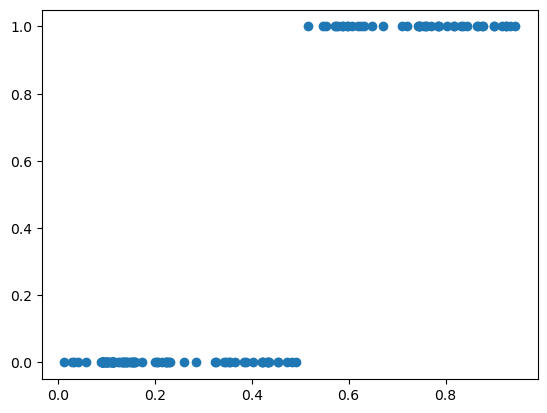

In [198]:
y_pred_proba3 = np.array([i[1] for i in y_pred_proba3])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba3, y_pred3)


The accuracy for train = .80, Valdiate = .85, Test = .77. From validate to test there is a .03 drop. 